+ 원핫인코딩:
    - 0과 1로 표현
    - 공간 낭비가 심하다
    - 단어의 의미를 이해할 수 없다
    - 단어의 종류의 개수 = 차원의 개수
    - 단어간의 유사한 관계가 표현되지 않음
+ 밀집벡터:
    - 훈련 데이터를 통해 학습으로 만들어진다
    - 저차원 공간에 임베딩된다(?)
    - 차원 != 단어 종류의 개수
    - 실수 형태로 표현된다
    - 공간 낭비가 원핫인코딩에 비해 덜하다
    

In [11]:
import numpy as np
import pandas as pd

import re
import urllib.request

from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize

## ted

In [2]:
# urllib.request.urlretrieve('https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml', filename='ted_en-20160408.xml')

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x26203058d30>)

In [4]:
targetXML = open('c:/reposit/data/bigleader/ted_en-20160408.xml', 'r', encoding='UTF8')

target_text = etree.parse(targetXML)

# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행.
sent_text = sent_tokenize(content_text)

# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.
normalized_text = []
for string in sent_text:
     tokens = re.sub(r'[^a-z0-9]+'', ' ', string.lower())
     normalized_text.append(tokens)

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
result = [word_tokenize(sentence) for sentence in normalized_text]

targetXML.close()

In [6]:
result[:1]

[['here',
  'are',
  'two',
  'reasons',
  'companies',
  'fail',
  'they',
  'only',
  'do',
  'more',
  'of',
  'the',
  'same',
  'or',
  'they',
  'only',
  'do',
  'what',
  's',
  'new']]

In [14]:
len(result) # 문장의 개수: 약 27만개

273424

In [39]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

# model = Word2Vec(sentences=result, vector_size=100, window=5, min_count=5, workers=4, sg=0)

# 벡터의 크기, 차원: 100차원
# sg=0 skipgram 아니다라는 뜻 -> 시보? 시봉?
# 중심 단어로 주변 단어를 예측하겠다 -> skipgram
# min_count: 최소 몇 번 이상 등장한 단어 횟수
# workers: cpu
# window: 겹치는 단어

## ratings

In [16]:
# urllib.request.urlretrieve('https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt', filename='c:/reposit/data/bigleader/ratings.txt')

('c:/reposit/data/bigleader/ratings.txt',
 <http.client.HTTPMessage at 0x262414ea7c0>)

In [18]:
df = pd.read_table('c:/reposit/data/bigleader/ratings.txt')
df.shape

(200000, 3)

In [19]:
df.head(3)

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1


In [22]:
df.isnull().sum().to_frame('nan')

,nan
id,0
document,8
label,0


In [26]:
df[df['document'].isnull()]

,id,document,label
46471,6369843,NaN,1
60735,511097,NaN,1
77665,2172111,NaN,1
84098,402110,NaN,1
127017,5942978,NaN,0
172375,5026896,NaN,0
173526,1034280,NaN,0
197279,1034283,NaN,0


In [28]:
# 결측치 제거
# df.dropna(inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199992 entries, 0 to 199999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        199992 non-null  int64 
 1   document  199992 non-null  object
 2   label     199992 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 6.1+ MB


In [25]:
df['label'].unique()

array([1, 0], dtype=int64)

In [32]:
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다']

In [31]:
from konlpy.tag import Okt

In [35]:
okt = Okt()
res = []

for sentence in df['document']:
    tok_sentence = okt.morphs(sentence) # 토큰화
    
    pre_sentence = [word for word in tok_sentence if not word in stopwords]
    res.append(pre_sentence)
    
res[:5]

[['어릴', '때', '보고', '지금', '다시', '봐도', '재밌어요', 'ㅋㅋ'],
 ['디자인',
  '을',
  '배우는',
  '학생',
  ',',
  '외국',
  '디자이너',
  '그',
  '일군',
  '전통',
  '을',
  '통해',
  '발전',
  '해가는',
  '문화',
  '산업',
  '부러웠는데',
  '.',
  '사실',
  '우리나라',
  '에서도',
  '그',
  '어려운',
  '시절',
  '끝',
  '까지',
  '열정',
  '을',
  '지킨',
  '노라노',
  '같은',
  '전통',
  '있어',
  '저',
  '같은',
  '사람',
  '꿈',
  '을',
  '꾸고',
  '이뤄',
  '나갈',
  '수',
  '있다는',
  '것',
  '감사합니다',
  '.'],
 ['폴리스스토리', '시리즈', '1', '부터', '뉴', '까지', '버릴께', '하나', '없음', '..', '최고', '.'],
 ['..',
  '연기',
  '진짜',
  '개',
  '쩔구나',
  '..',
  '지루할거라고',
  '생각',
  '했는데',
  '몰입',
  '해서',
  '봤다',
  '..',
  '그래',
  '이런게',
  '진짜',
  '영화',
  '지'],
 ['안개', '자욱한', '밤하늘', '떠', '있는', '초승달', '같은', '영화', '.']]

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

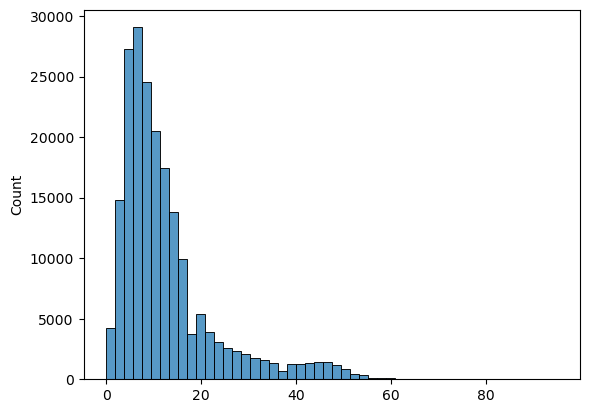

In [38]:
sns.histplot([len(l1) for l1 in res], bins=50)
plt.show()

In [42]:
model = Word2Vec(sentences=res, vector_size=100, window=5, min_count=5, workers=4, sg=0)

In [43]:
model.wv.vectors.shape

(27298, 100)

In [50]:
model.wv.most_similar('별')

[('줘도', 0.6638320088386536),
 ('10', 0.6604145169258118),
 ('0', 0.6470290422439575),
 ('한개', 0.6375964283943176),
 ('점수', 0.6352723836898804),
 ('주기도', 0.6303801536560059),
 ('십', 0.6295967102050781),
 ('반개', 0.6238942742347717),
 ('별하나', 0.6196690201759338),
 ('0.1', 0.6168867349624634)]

In [51]:
model.wv.most_similar('엄마')

[('아빠', 0.9370843768119812),
 ('딸', 0.896224319934845),
 ('할머니', 0.8543333411216736),
 ('아들', 0.8542495369911194),
 ('남편', 0.8532091975212097),
 ('동생', 0.8429497480392456),
 ('아버지', 0.8372926115989685),
 ('친구', 0.8128020763397217),
 ('아내', 0.8066561818122864),
 ('어머니', 0.7761870622634888)]

In [52]:
model.wv.most_similar('재미')

[('감흥', 0.6139650344848633),
 ('스릴', 0.6072818636894226),
 ('잼', 0.5978935956954956),
 ('참신함도', 0.5911329388618469),
 ('어이', 0.5836990475654602),
 ('별거', 0.5762650370597839),
 ('긴장감', 0.5669769644737244),
 ('할말', 0.5514605045318604),
 ('형편', 0.5505734086036682),
 ('나무랄데', 0.5463178753852844)]

In [53]:
from gensim.models import FastText

In [55]:
model = FastText(result, vector_size=100, window=5, min_count=5, workers=4, sg=1)

In [56]:
model.wv.most_similar('man')

[('batman', 0.8003790378570557),
 ('woman', 0.7970297336578369),
 ('hoffman', 0.780261754989624),
 ('ekman', 0.7746593952178955),
 ('shaman', 0.757448673248291),
 ('salman', 0.7534903883934021),
 ('fireman', 0.7505514025688171),
 ('kahneman', 0.7485842704772949),
 ('goldman', 0.7360493540763855),
 ('newman', 0.7310588955879211)]

## spam

In [58]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [60]:
urllib.request.urlretrieve('https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/10.%20RNN%20Text%20Classification/dataset/spam.csv', filename='c:/reposit/data/bigleader/spam.csv')
df = pd.read_csv('c:/reposit/data/bigleader/spam.csv', encoding='latin1')
print('총 샘플의 수 :', df.shape)

총 샘플의 수 : (5572, 5)


In [61]:
df.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [65]:
df.isnull().sum().to_frame('nan')

,nan
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


In [67]:
df[~df['Unnamed: 2'].isnull()]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
95,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
444,ham,\HEY HEY WERETHE MONKEESPEOPLE SAY WE MONKEYAR...,HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE ...,NaN,NaN
671,spam,SMS. ac sun0819 posts HELLO:\You seem cool,"wanted to say hi. HI!!!\"" Stop? Send STOP to ...",NaN,NaN
710,ham,Height of Confidence: All the Aeronautics prof...,"this wont even start........ Datz confidence..""",NaN,NaN
899,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
1038,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""
1127,ham,"Height of \Oh shit....!!\"" situation: A guy th...",".;-):-D""",NaN,NaN
1266,ham,\Hey sorry I didntgive ya a a bellearlier hunny,just been in bedbut mite go 2 thepub l8tr if u...,NaN,NaN
1384,ham,"Storming msg: Wen u lift d phne, u say \HELLO\...","bt not his girlfrnd... G o o d n i g h t . . .@""",NaN,NaN


In [70]:
df = df.iloc[:, :2]
df.head(3)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [73]:
# v1 컬럼 인코딩
df['v1'] = df['v1'].replace({'ham': 0, 'spam': 1})
df.head(3)

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


In [74]:
# 컬럼명 변경
df.columns = ['label', 'title']
df.head(3)

,label,title
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   int64 
 1   title   5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [79]:
df.describe()

,label
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [80]:
df.label.value_counts()

0    4825
1     747
Name: label, dtype: int64

In [81]:
# title 컬럼 중복값 제거
# df.drop_duplicates(subset=['title'], inplace=True)

In [82]:
len(df)

5169

+ meta learning
+ few shot learning
    - 적은 숫자의 사진으로 학습하기

In [96]:
# 데이터 분리
x = df['title']
y = df['label']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=20230728)

In [88]:
len(x_train), len(x_test), len(y_train), len(y_test)

(4135, 1034, 4135, 1034)

In [90]:
y_train.value_counts(), y_test.value_counts()

(0    3607
 1     528
 Name: label, dtype: int64,
 0    909
 1    125
 Name: label, dtype: int64)

In [95]:
528/3607, 125/909

(0.14638203493207652, 0.13751375137513752)

In [97]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=20230728, stratify=y)

In [98]:
y_train.value_counts(), y_test.value_counts()

(0    3613
 1     522
 Name: label, dtype: int64,
 0    903
 1    131
 Name: label, dtype: int64)

In [99]:
522/3613, 131/903

(0.14447827290340437, 0.1450719822812846)

In [100]:
# 단어에 대한 전처리

tok = Tokenizer()
tok.fit_on_texts(x_train) # x_train을 
x_train_enc = tok.texts_to_sequences(x_train)

In [106]:
w2i = tok.word_index
# tok.index_word

len(w2i), x_train.shape, x_test.shape

(7831, (4135,), (1034,))

In [116]:
# maxlen
ml = max(map(len, x_train_enc)) # 최대 단어 개수
ml

121

In [110]:
# 평균 len
sum(map(len, x_train_enc)) / len(x_train_enc)

15.509552599758162

In [115]:
min(map(len, x_train_enc))

0

In [118]:
# padding
x_tr_pad = pad_sequences(x_train_enc, maxlen=ml)
x_tr_pad.shape

(4135, 121)

In [119]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential

In [122]:
x_tr_pad[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,   35,  743,  936,    8, 1813,   12,   17])

In [123]:
# 1번부터 단어의 번호 부여. 
# 0 패딩을 했으므로 1을 더하여 단어 사전 크기를 설정
# 0이 없으므로 +1을 통해 0의 자리를 추가
vocab_size = len(w2i) + 1

In [124]:
model = Sequential()

model.add(Embedding(vocab_size, 32))
model.add(SimpleRNN(10)) # 100차원
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          250624    
                                                                 
 simple_rnn (SimpleRNN)      (None, 10)                430       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 251,065
Trainable params: 251,065
Non-trainable params: 0
_________________________________________________________________


In [125]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_tr_pad, y_train, epochs=5, batch_size=32, validation_split=.2)

Epoch 1/5
104/104 [==============================] - 6s 31ms/step - loss: 0.4163 - accuracy: 0.8752 - val_loss: 0.3650 - val_accuracy: 0.8682
Epoch 2/5
104/104 [==============================] - 3s 26ms/step - loss: 0.2573 - accuracy: 0.9132 - val_loss: 0.2097 - val_accuracy: 0.9589
Epoch 3/5
104/104 [==============================] - 3s 28ms/step - loss: 0.1214 - accuracy: 0.9770 - val_loss: 0.1167 - val_accuracy: 0.9734
Epoch 4/5
104/104 [==============================] - 3s 27ms/step - loss: 0.0646 - accuracy: 0.9909 - val_loss: 0.4134 - val_accuracy: 0.7956
Epoch 5/5
104/104 [==============================] - 3s 28ms/step - loss: 0.0688 - accuracy: 0.9882 - val_loss: 0.1177 - val_accuracy: 0.9710


+ 모델을 저장하면 모델의 구조와 weight들이 저장된다

In [126]:
x_te_enc = tok.texts_to_sequences(x_test)
x_te_pad = pad_sequences(x_te_enc, maxlen=ml)

model.predict(x_te_pad)
model.evaluate(x_te_pad, y_test)

33/33 [==============================] - 0s 8ms/step - loss: 0.1147 - accuracy: 0.9700


[0.1147010326385498, 0.9700193405151367]